In [1]:
import pandas as pd

# Caminhos para os arquivos CSV
historico_path = r'C:\FIAP\WeatherLearning\csv\historico\31_08_2024_a_30_09_2024.csv'
previsoes_path = r'C:\FIAP\WeatherLearning\csv\previsoes\30_09_2024_a_29_10_2024.csv'

# Leitura dos dados históricos
historico = pd.read_csv(historico_path)

# Leitura dos dados previstos
previsoes = pd.read_csv(previsoes_path)

# Selecionando as colunas relevantes
historico = historico[['date', 'tmin', 'tmax']]
previsoes = previsoes[['data', 'temp_min_prevista', 'temp_max_prevista']]

# Exibindo as primeiras linhas para confirmar a leitura
historico.head(-1), previsoes.head(-1)


(          date  tmin  tmax
 0   2024-08-30  16.3  28.3
 1   2024-08-31  16.4  27.2
 2   2024-09-01  15.5  26.3
 3   2024-09-02  15.4  26.3
 4   2024-09-03  15.4  28.0
 5   2024-09-04  17.0  31.0
 6   2024-09-05  16.0  26.0
 7   2024-09-06  15.0  21.0
 8   2024-09-07  17.0  33.0
 9   2024-09-08  18.0  33.0
 10  2024-09-09  17.0  33.0
 11  2024-09-10  14.0  32.0
 12  2024-09-11  15.0  32.0
 13  2024-09-12  15.0  32.0
 14  2024-09-13  16.0  32.0
 15  2024-09-14  17.0  28.0
 16  2024-09-15  17.0  21.0
 17  2024-09-16  14.0  17.2
 18  2024-09-17  13.7  17.0
 19  2024-09-18  14.1  21.0
 20  2024-09-19  15.9  24.0
 21  2024-09-20  16.0  32.0
 22  2024-09-21  16.0  27.0
 23  2024-09-22  18.0  31.0
 24  2024-09-23  16.0  33.0
 25  2024-09-24  18.0  34.0
 26  2024-09-25  19.9  34.0
 27  2024-09-26  21.0  35.0
 28  2024-09-27  18.1  26.2
 29  2024-09-28  15.7  24.6,
           data  temp_min_prevista  temp_max_prevista
 0   2024-09-30          16.237629          26.195090
 1   2024-10-01        

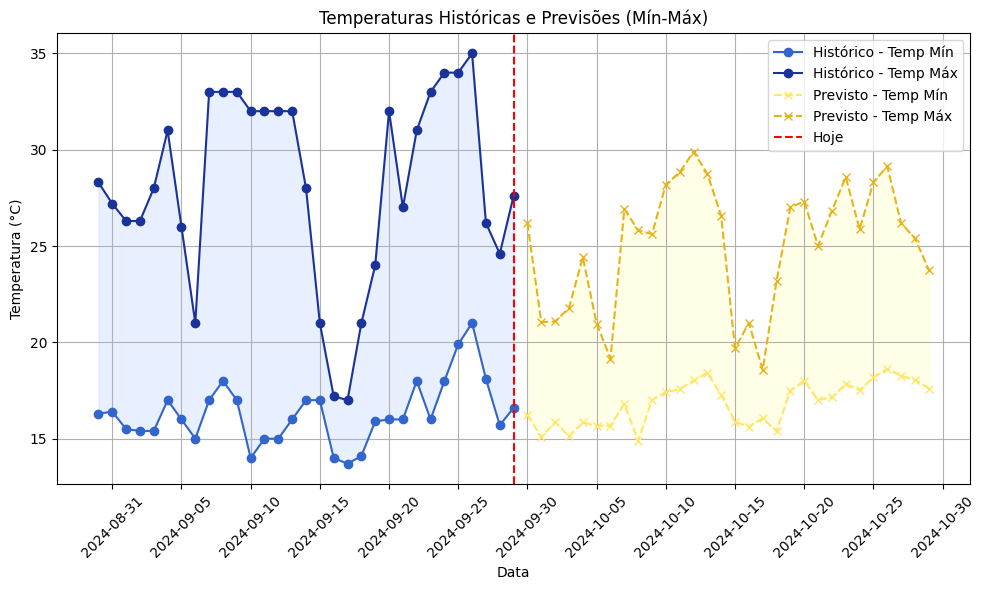

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Ler os arquivos CSV
historico = pd.read_csv(r'C:\FIAP\WeatherLearning\csv\historico\31_08_2024_a_30_09_2024.csv')
previsoes = pd.read_csv(r'C:\FIAP\WeatherLearning\csv\previsoes\30_09_2024_a_29_10_2024.csv')

# Definir as cores em RGB para as linhas
historico_min_rgb = (0.2, 0.4, 0.8)  # Azul para o histórico de temperatura mínima
historico_max_rgb = (0.1, 0.2, 0.6)  # Azul escuro para o histórico de temperatura máxima
previsao_min_rgb = (1.0, 0.9, 0.4)   # Amarelo para a previsão de temperatura mínima
previsao_max_rgb = (0.9, 0.7, 0.1)   # Amarelo escuro para a previsão de temperatura máxima

# Cores mais claras para o preenchimento
fill_historico_rgb = (0.7, 0.8, 1.0)  # Azul claro para o preenchimento histórico
fill_previsao_rgb = (1.0, 1.0, 0.7)   # Amarelo claro para o preenchimento previsto

# Converter as colunas de datas para datetime
historico['date'] = pd.to_datetime(historico['date'])
previsoes['data'] = pd.to_datetime(previsoes['data'])

# Unir os dados históricos e previstos em um único dataframe
dados = pd.DataFrame({
    'date': pd.concat([historico['date'], previsoes['data']]),
    'tmin': pd.concat([historico['tmin'], previsoes['temp_min_prevista']]),
    'tmax': pd.concat([historico['tmax'], previsoes['temp_max_prevista']])
})

# Data de transição (última data do histórico)
data_transicao = historico['date'].iloc[-1]

# Plotando os dados
plt.figure(figsize=(10, 6))

# Preenchendo a área entre as temperaturas mínimas e máximas para os dados históricos
plt.fill_between(dados['date'][:len(historico)], dados['tmin'][:len(historico)], dados['tmax'][:len(historico)],
                 color=fill_historico_rgb, alpha=0.3)

# Preenchendo a área entre as temperaturas mínimas e máximas para os dados previstos
plt.fill_between(dados['date'][len(historico):], dados['tmin'][len(historico):], dados['tmax'][len(historico):],
                 color=fill_previsao_rgb, alpha=0.3)

# Plotando as linhas das temperaturas mínimas e máximas
plt.plot(dados['date'][:len(historico)], dados['tmin'][:len(historico)], label='Histórico - Temp Mín', color=historico_min_rgb, marker='o')
plt.plot(dados['date'][:len(historico)], dados['tmax'][:len(historico)], label='Histórico - Temp Máx', color=historico_max_rgb, marker='o')
plt.plot(dados['date'][len(historico):], dados['tmin'][len(historico):], label='Previsto - Temp Mín', color=previsao_min_rgb, linestyle='--', marker='x')
plt.plot(dados['date'][len(historico):], dados['tmax'][len(historico):], label='Previsto - Temp Máx', color=previsao_max_rgb, linestyle='--', marker='x')

# Adicionando a linha vermelha tracejada na data de transição
plt.axvline(x=data_transicao, color='red', linestyle='--', label='Hoje')

# Ajustando o eixo X para exibir uma data a cada 5 dias
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Ajustando o gráfico
plt.title('Temperaturas Históricas e Previsões (Mín-Máx)')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend(handles=[plt.Line2D([0], [0], color=historico_min_rgb, marker='o', label='Histórico - Temp Mín'),
                    plt.Line2D([0], [0], color=historico_max_rgb, marker='o', label='Histórico - Temp Máx'),
                    plt.Line2D([0], [0], color=previsao_min_rgb, linestyle='--', marker='x', label='Previsto - Temp Mín'),
                    plt.Line2D([0], [0], color=previsao_max_rgb, linestyle='--', marker='x', label='Previsto - Temp Máx'),
                    plt.Line2D([0], [0], color='red', linestyle='--', label='Hoje')])

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

